In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from upsetplot import UpSet
import seaborn as sns

In [2]:
# Cargar datos de archivo CSV
data = pd.read_csv('../data/glaucoma_dataset.csv')

In [3]:
data.head()

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,Present,Open,"Tunnel vision, Eye pain, Nausea",No Glaucoma,Primary Open-Angle Glaucoma
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,Absent,Open,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,Juvenile Glaucoma
2,63329,67,Female,20/40,23.65,0.72,No,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,Absent,Closed,"Halos around lights, Vision loss, Redness in t...",No Glaucoma,Juvenile Glaucoma
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,NaN,"Ibuprofen, Aspirin","Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,Absent,Closed,"Nausea, Nausea, Halos around lights",No Glaucoma,Congenital Glaucoma
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,Absent,Closed,"Eye pain, Eye pain, Tunnel vision",No Glaucoma,Primary Open-Angle Glaucoma


In [4]:
data.shape

(10000, 17)

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             7453 non-null   object 
 8   Medication Usage                            8769 non-null   object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

In [6]:
# Preparar los datos para el gráfico (Age vs Intraocular Pressure)
line_data = data[['Age', 'Intraocular Pressure (IOP)']].dropna()

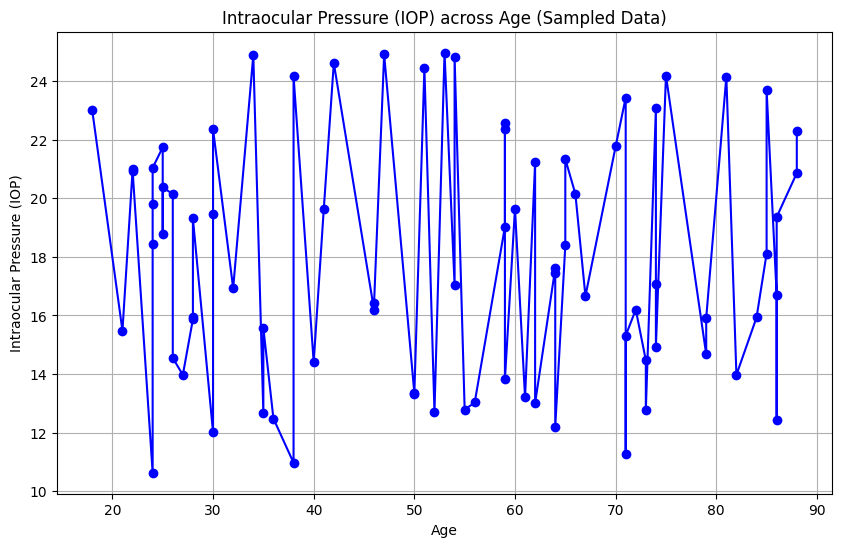

<Figure size 640x480 with 0 Axes>

In [7]:
# Filtrar los datos de edad e IOP y tomar una muestra
line_data = data[['Age', 'Intraocular Pressure (IOP)']].dropna()
sample_data = line_data.sample(80, random_state=1).sort_values(by='Age')

# Crear el gráfico de líneas con los datos de muestra
plt.figure(figsize=(10, 6))
plt.plot(sample_data['Age'], sample_data['Intraocular Pressure (IOP)'], marker='o', linestyle='-', color='blue')
plt.title('Intraocular Pressure (IOP) across Age (Sampled Data)')
plt.xlabel('Age')
plt.ylabel('Intraocular Pressure (IOP)')
plt.grid(True)
plt.show()
# Guardar el gráfico como imagen
plt.savefig('../output/lineplot.png')


In [8]:
# Seleccionar un valor de IOP de ejemplo, por ejemplo el primero del dataset
iop_value = data['Intraocular Pressure (IOP)'].dropna().iloc[0]

In [9]:
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=iop_value,
    title={'text': "Intraocular Pressure (IOP)"},
    gauge={
        'axis': {'range': [10, 30]},
        'steps': [
            {'range': [10, 21], 'color': "lightgreen"},
            {'range': [21, 24], 'color': "yellow"},
            {'range': [24, 30], 'color': "red"}],
        'threshold': {
            'line': {'color': "black", 'width': 4},
            'thickness': 0.75,
            'value': 21}}))

fig.show()

# guardar plot en fichero
#fig.write_image("../output/gauge.png")

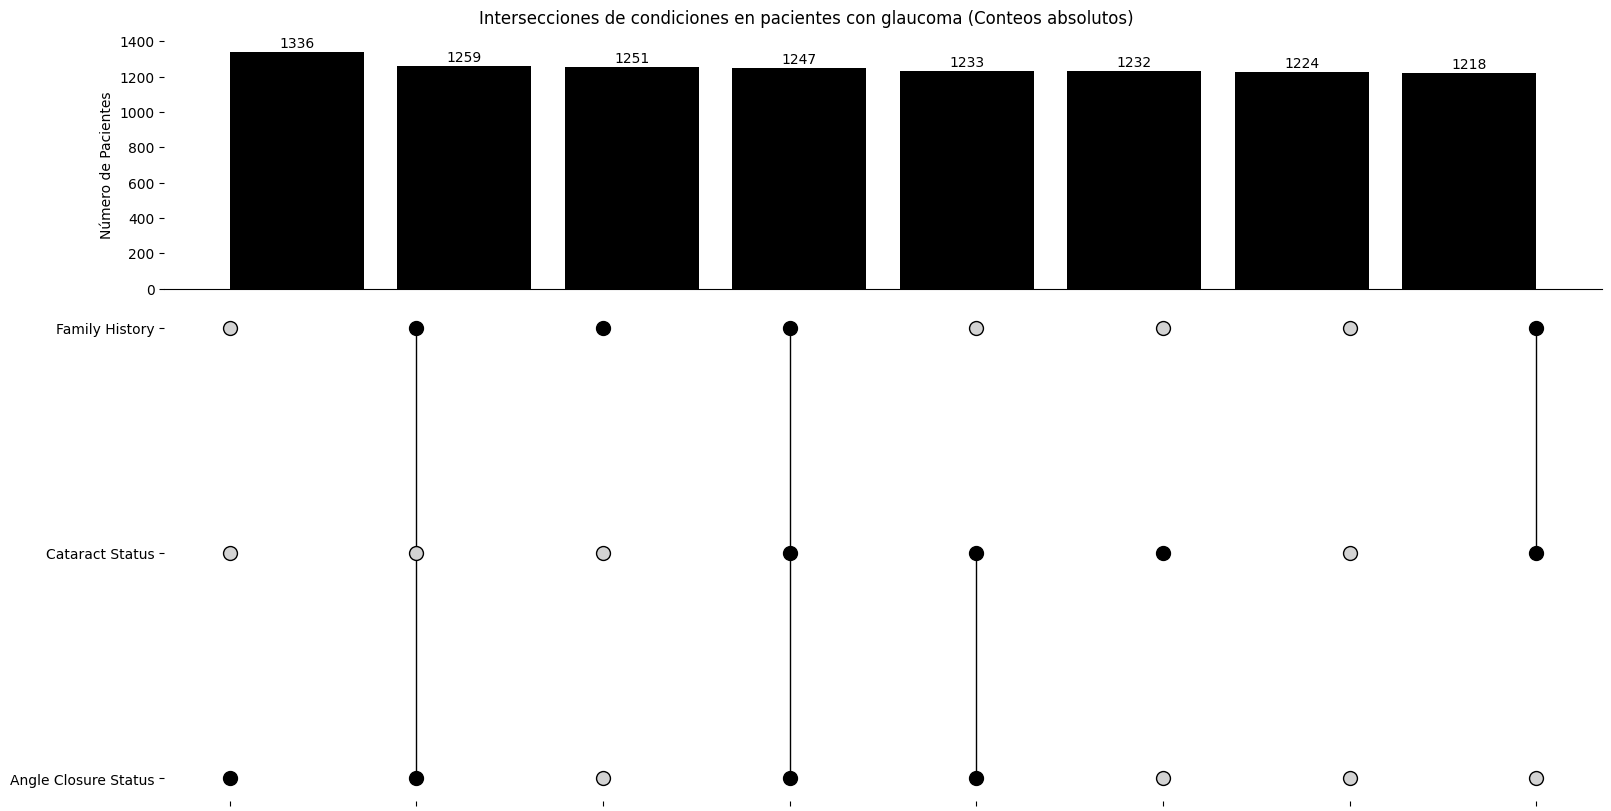

<Figure size 640x480 with 0 Axes>

In [10]:
# Crear conjuntos de datos binarios para diferentes condiciones
conditions = pd.DataFrame({
    "Family History": data['Family History'].apply(lambda x: 1 if x == "Yes" else 0),
    "Cataract Status": data['Cataract Status'].apply(lambda x: 1 if x == "Present" else 0),
    "Angle Closure Status": data['Angle Closure Status'].apply(lambda x: 1 if x == "Closed" else 0)
})

# Contar cada combinación de condiciones
conditions_count = conditions.value_counts().reset_index()
conditions_count.columns = ["Family History", "Cataract Status", "Angle Closure Status", "Count"]

# Configuración de la figura
fig, (ax_bar, ax_matrix) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 2]}, figsize=(16, 8), constrained_layout=True)

# Crear el gráfico de barras (parte superior) con etiquetas
bars = ax_bar.bar(range(len(conditions_count)), conditions_count['Count'], color='black')
ax_bar.set_ylabel("Número de Pacientes")
ax_bar.set_xticks([])
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)
ax_bar.spines['left'].set_visible(False)

# Añadir etiquetas encima de cada barra
for bar in bars:
    yval = bar.get_height()
    ax_bar.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', color="black")

# Crear la matriz de puntos (parte inferior) para representar los conjuntos
for i, row in conditions_count.iterrows():
    for j, condition in enumerate(["Family History", "Cataract Status", "Angle Closure Status"]):
        color = 'black' if row[condition] == 1 else 'lightgrey'
        ax_matrix.scatter(i, j, color=color, s=100, edgecolor='black', zorder=3)
    
    # Dibujar líneas de conexión para conjuntos presentes
    present_conditions = [j for j, condition in enumerate(["Family History", "Cataract Status", "Angle Closure Status"]) if row[condition] == 1]
    if len(present_conditions) > 1:
        ax_matrix.plot([i] * len(present_conditions), present_conditions, color='black', linewidth=1, zorder=2)

# Configuración de la matriz de puntos
ax_matrix.set_yticks(range(3))
ax_matrix.set_yticklabels(["Family History", "Cataract Status", "Angle Closure Status"])
ax_matrix.set_xticks(range(len(conditions_count)))
ax_matrix.set_xticklabels([""] * len(conditions_count))
ax_matrix.invert_yaxis()
ax_matrix.spines['top'].set_visible(False)
ax_matrix.spines['right'].set_visible(False)
ax_matrix.spines['left'].set_visible(False)
ax_matrix.spines['bottom'].set_visible(False)

plt.suptitle("Intersecciones de condiciones en pacientes con glaucoma (Conteos absolutos)")
plt.show()
plt.savefig('../output/upsetdiagram.png')